# Which census geography most closely maps with my hometown?

The larger purpose of this analysis is to use Census data to see how my hometown (Great Neck, New York) changed over my lifetime (1978-present). There are many issues with mapping this simple concept to Census data. The first is one of geography: "Great Neck, NY" is not a well-defined geography in the Census Bureau. So I cannot get data on it in the way that I can for larger areas like "New York State", "New York City" or "Manhattan, New York". And using the smallest possible geography (Census Block) seems like it would be missing a lot about my hometown.

This notebook demonstrates the various geographies I considered for the project. I believe that the code will be useful for anyone else who needs to experiment with Census geographies in order to find something that best meets their needs.

Those new to Census geography might benefit by first reviewing [this](https://www2.census.gov/geo/pdfs/reference/geodiagram.pdf) diagram which shows the Census geographic hierarchy.

For reference: I eventually chose to use the School District I attended (`Great Neck Union Free School District, New York`, ID `12510` in State `36`). But this was only after first trying "Places", "ZIP Code Tabulation Areas" and the "County Subdivision" which encapsulates the town I grew up in.

### Attempt 1: "Places"

The `censusdis` package has a `places` directory which in turn contains a file for each state. Each file contains the Census-defined "places" in that state. The `new_york.py` file has 4 "places" that have Great Neck in their name ([link](https://github.com/censusdis/censusdis/blob/main/censusdis/places/new_york.py#L436)):

```py
GREAT_NECK_ESTATES_VILLAGE = "30191"
GREAT_NECK_GARDENS_CDP = "30202"
GREAT_NECK_PLAZA_VILLAGE = "30213"
GREAT_NECK_VILLAGE = "30169"
```

Unfortunately, even taken together, this geography seems to be missing a lot of what I consider to be Great Neck (including my actual childhood home!) In particular, there are large "holes" in the geography which I consider to be important.

Text(0.5, 1.0, '2023 4 "places" in Great Neck')

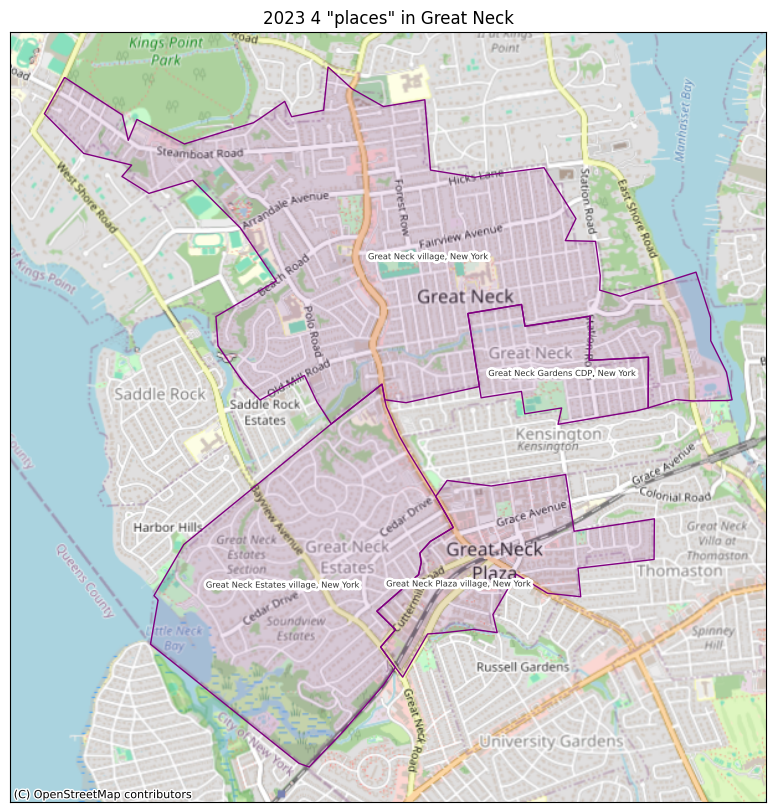

In [3]:
from censusdis.places.new_york import (
    GREAT_NECK_ESTATES_VILLAGE,
    GREAT_NECK_GARDENS_CDP,
    GREAT_NECK_PLAZA_VILLAGE,
    GREAT_NECK_VILLAGE,
)

import censusdis.data as ced
import censusdis.maps as cem
from censusdis.datasets import ACS5
from censusdis.states import NY

gn_places = ced.download(
    dataset=ACS5,
    vintage=2023,
    group="B03002",
    state=NY,
    place=[
        GREAT_NECK_ESTATES_VILLAGE,
        GREAT_NECK_GARDENS_CDP,
        GREAT_NECK_PLAZA_VILLAGE,
        GREAT_NECK_VILLAGE,
    ],
    with_geometry=True,
)

ax = cem.plot_map(
    gn_places,
    color="purple",
    alpha=0.1,
    figsize=(10, 10),
    with_background=True,
    geo_label="NAME",
    geo_label_text_kwargs={"size": 6},
)
ax = cem.plot_map(gn_places.boundary, color="purple", linewidth=1.0, ax=ax)

ax.set_title('2023 4 "places" in Great Neck')

### Attempt 2: ZIP Code Tabulation Areas (ZCTA)

I mostly grew up in ZIP Code 11021 but later moved to 11020. Like most people, I know the ZIP codes I lived in but am unsure of the neighboring ones or what their boundaries are.

Further more, the Census approximation of ZIP Codes ([ZIP Code Tabulation Areas](https://en.wikipedia.org/wiki/ZIP_Code_Tabulation_Area)) have another issue: they were first used in the 2000 Census so I cannot use them for the full analysis which interests me.

Nonetheless, like many people, I strongly associate my neighborhood with its ZIP code, so I decided to at least map my hometown ZIP Code +- 1. The problem with this is that it does not encompass the entire peninsula which I consider to be part of Great Neck.

Text(0.5, 1.0, 'ZCTAs around Great Neck')

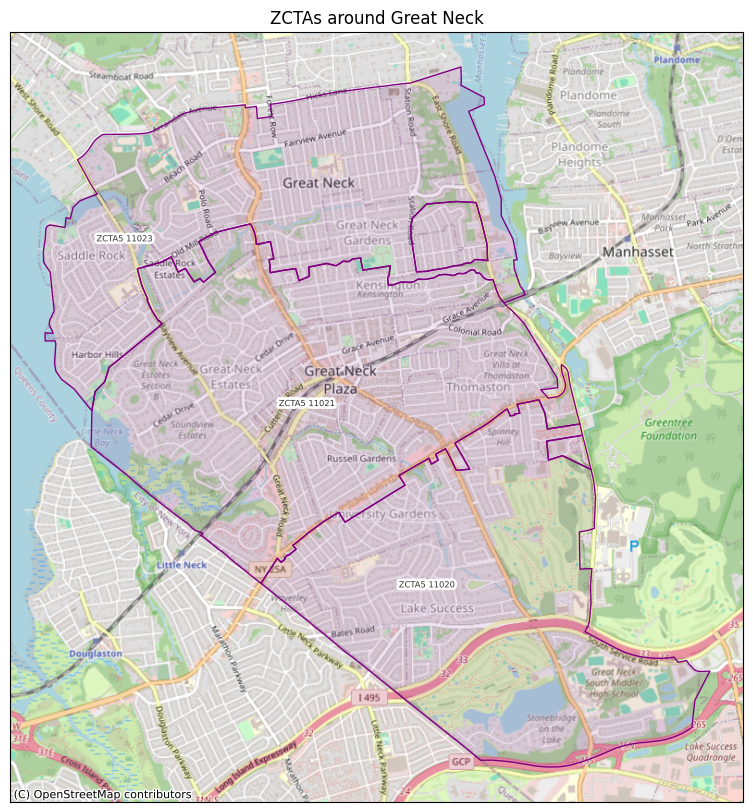

In [4]:
gn_zctas = ced.download(
    dataset=ACS5,
    vintage=2023,
    group="B03002",
    zip_code_tabulation_area=["11021", "11020", "11023"],
    with_geometry=True,
)

ax = cem.plot_map(
    gn_zctas,
    color="purple",
    alpha=0.1,
    figsize=(10, 10),
    with_background=True,
    geo_label="NAME",
    geo_label_text_kwargs={"size": 6},
)
ax = cem.plot_map(gn_zctas.boundary, color="purple", linewidth=1.0, ax=ax)

ax.set_title("ZCTAs around Great Neck")

### Attempt 3: County Subdivisions

I became interested in County Subdivisions because I was looking for a small geography that encompassed Great Neck. As you can see below, "North Hempstead town" encompasses Great Neck. (This was actually news to me!) And you can also see the peninsula that I was referring to earlier. 

This would work for my purposes, but I wondered if I could find something that more closely covered what I consider to be Great Neck.


Text(0.5, 1.0, 'County Subdivisions in Nassau County')

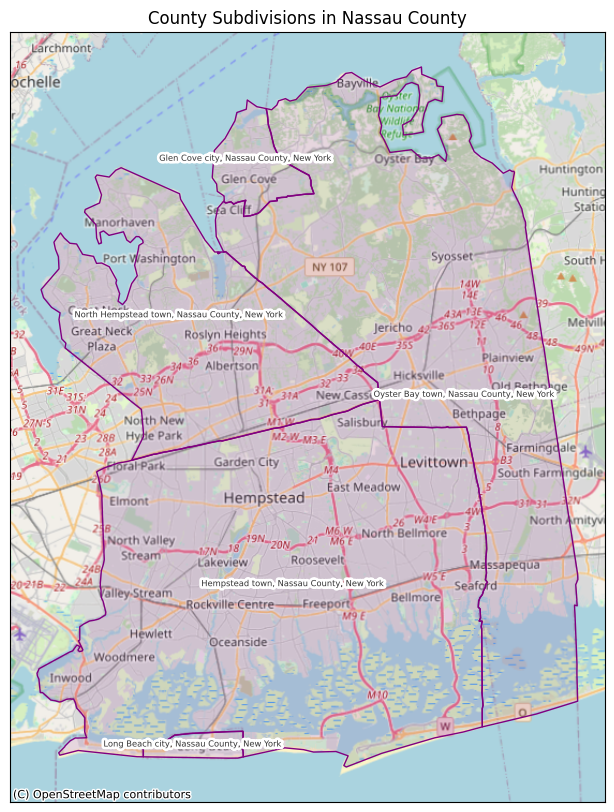

In [5]:
from censusdis.counties.new_york import NASSAU

county_subdivisions = ced.download(
    dataset=ACS5,
    vintage=2023,
    group="B03002",
    state=NY,
    county=NASSAU,
    county_subdivision="*",
    with_geometry=True,
)

ax = cem.plot_map(
    county_subdivisions,
    color="purple",
    alpha=0.1,
    figsize=(10, 10),
    with_background=True,
    geo_label="NAME",
    geo_label_text_kwargs={"size": 6},
)
ax = cem.plot_map(county_subdivisions.boundary, color="purple", linewidth=1.0, ax=ax)

ax.set_title("County Subdivisions in Nassau County")

### Attempt 4: School Districts

I had heard of the School District geography before but never used it. The Census API has 3 types of School Districts to choose from, and I found mine (`Great Neck Union Free School District, New York`) in the `school_district_unified` variable.

Funny story: my hometown had two high schools: North and South. From the map below you can clearly see where they got their names from. And once I saw this map I realized that this was the correct geography for me to use: your hometown is, in part, defined by your experience with your school. And this blankets that nicely.

The code below lists all the School Districts in the state in alphabetical order. I used the Data Wrangler tool in VS Code to find my school. I then mapped the geography using similar code as above.

In [7]:
school_districts = ced.download(
    dataset=ACS5,
    vintage=2023,
    group="B03002",
    state=NY,
    school_district_unified="*",
    with_geometry=True,
)

school_district_names = school_districts.NAME.sort_values()
school_district_names

29             Addison Central School District, New York
80          Adirondack Central School District, New York
30               Afton Central School District, New York
31               Akron Central School District, New York
32                 Albany City School District, New York
                             ...                        
658            Wyoming Central School District, New York
659               Yonkers City School District, New York
660               York Central School District, New York
159    Yorkshire-Pioneer Central School District, New...
661           Yorktown Central School District, New York
Name: NAME, Length: 664, dtype: object

In [8]:
school_districts[
    school_districts.NAME == "Great Neck Union Free School District, New York"
]

STATE SCHOOL_DISTRICT_UNIFIED  B03002_001E  B03002_002E  B03002_003E  \
235    36                   12510        47891        44333        29013   

     B03002_004E  B03002_005E  B03002_006E  B03002_007E  B03002_008E  ...  \
235          626          142        13096            5          541  ...   

     B03002_015E  B03002_016E  B03002_017E  B03002_018E  B03002_019E  \
235            0           16            0         1508          599   

     B03002_020E  B03002_021E            GEO_ID  \
235          551           48  9700000US3612510   

                                                NAME  \
235  Great Neck Union Free School District, New York   

                                              geometry  
235  POLYGON ((-73.7647 40.8116, -73.75403 40.82094...  

[1 rows x 26 columns]

Text(0.5, 1.0, 'Great Neck Union Free School District, New York')

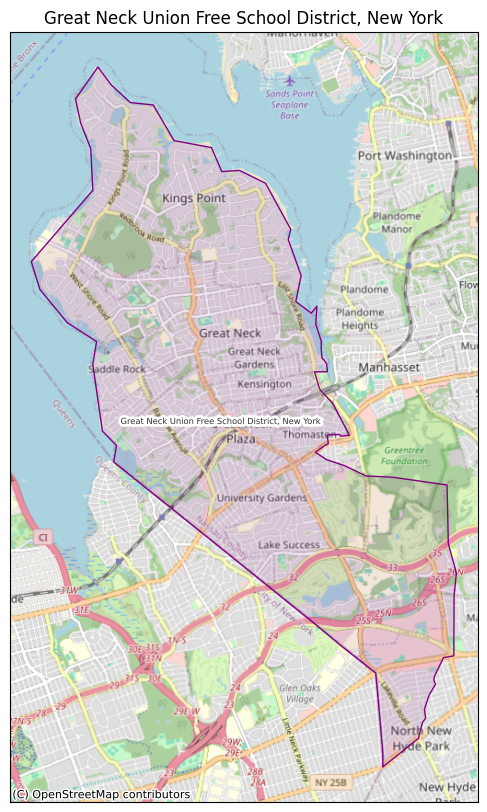

In [10]:
gn_school = ced.download(
    dataset=ACS5,
    vintage=2023,
    group="B03002",
    state=NY,
    school_district_unified="12510",
    with_geometry=True,
)

ax = cem.plot_map(
    gn_school,
    color="purple",
    alpha=0.1,
    figsize=(10, 10),
    with_background=True,
    geo_label="NAME",
    geo_label_text_kwargs={"size": 6},
)
ax = cem.plot_map(gn_school.boundary, color="purple", linewidth=1.0, ax=ax)

ax.set_title("Great Neck Union Free School District, New York")